In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from IPython.display import Image, display_png

In [2]:
#snssns..set_styleset_sty ('whitegrid')
%matplotlib inline

pd.set_option("display.max_columns", 200) # 表示カラムの最大値
pd.set_option('display.max_rows', 200) # 表示行数の最大値
pd.set_option('display.max_colwidth', 30)
pd.set_option("display.float_format", '{:.2f}'.format) # 小数点以下の有効数字

# jupyterの幅を自動調整
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

データ読み込み

In [3]:
iris = datasets.load_iris()
# iris.data = [(がく片の長さ、がく片の幅、花びらの長さ、花びらの幅)]
x_vals = np.array( [ x[0:3] for x in iris.data ])
y_vals = np.array( [ x[3]  for x in iris.data])

sess = tf.Session()

In [4]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [5]:
# train / test　に分割
train_indices = np.random.choice( len(x_vals),  round(len(x_vals) * 0.8), replace=False )
test_indice = np.array( list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indice]

y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indice]

In [6]:
train_indices

array([  6,   3, 113,  12,  24, 129,  25, 108, 128,  45,  48,  42,  35,
         5,  85,  54,  41,  96, 144,  89,  77,  74, 115,  94,  87,  29,
         2, 127,  44, 125, 126,  23,  64, 117,  84,  14, 132,  91,  53,
       141,  78,  97, 143,  93,  11, 134,  28,  65,   0,  27,  36, 106,
       148, 131,  20, 140, 136, 105, 119,  13,  30, 101,  99,  59, 135,
       123,  71,  21,  55,  16, 114,  92,  98,  18,  81,  61,  86, 122,
         1,  56,  19,  82, 120,   9,  60,  34,  40,  10, 112, 100,  26,
        32, 146, 118,  62, 109,  57,  73, 147,  17, 130, 149, 111,   8,
       121,  39,  49,  79, 139,  90, 133,  50,  76, 110,  52,  80,  66,
       138,  83, 142])

min-maxスケーリングを使って特徴量を0〜1に正規化する

In [9]:
def normalize_cols(m) :
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return ( m - col_min) / (col_max - col_min)


In [10]:
x_vals_train = np.nan_to_num( normalize_cols(x_vals_train) )
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

バッチサイズを設定し、データと目的値のプレースホルダーを初期化する

In [11]:
batch_size = 50

x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

ネットワーク作成

In [12]:
display_png(Image('99.image/04_nn_layout.png'))

In [13]:
hidden_layer_nodes = 5

# 入力　から　隠れ層のノード
A1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
# 隠れ層のノードごとに１つのバイアス
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
#  隠れ層の入力　から　１つの出力
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
# 出力のバイアス
b2 = tf.Variable(tf.random_normal(shape=[1]))



In [14]:
# 隠れ層の出力を作成
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1),  b1) )
# モデルの最終的な出力を作成
final_output = tf.nn.relu( tf.add(tf.matmul(hidden_output, A2), b2 ))

In [15]:
# 平均二乗誤差
loss = tf.reduce_mean(tf.square( y_target - final_output))

In [16]:
# 最適化関数
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

In [19]:
# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

loss_vec_train = []
loss_vec_test = []

for i in range(500) :
    # バッチを選択するためのインデックスをランダムに選択
    rand_index = np.random.choice(len(x_vals_train),  size=batch_size)
    #  
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
   # トレーニングステップを実行
    sess.run( train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    #　トレーニングセットの損失値を保存
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y })
    loss_vec_train.append(np.sqrt(temp_loss))
    
    # テストセットの損失値を保存
    test_temp_loss = sess.run(loss, feed_dict={ x_data: x_vals_test, y_target: np.transpose([y_vals_test]) })
    loss_vec_test.append(np.sqrt(test_temp_loss))
    
    if ( i + 1)%50 == 0:
        print('Generation: ' + str(i+1) + ' . Loss = ' + str(temp_loss))
    

Generation: 50 . Loss = 0.174362
Generation: 100 . Loss = 0.195645
Generation: 150 . Loss = 0.142711
Generation: 200 . Loss = 0.147288
Generation: 250 . Loss = 0.194719
Generation: 300 . Loss = 0.135212
Generation: 350 . Loss = 0.126367
Generation: 400 . Loss = 0.120059
Generation: 450 . Loss = 0.131284
Generation: 500 . Loss = 0.124116


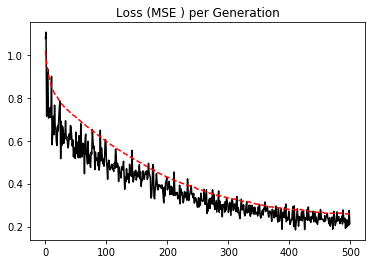

In [97]:
plt.plot(loss_vec_train, 'k-',  label='Train loss')
plt.plot(loss_vec_test,  'r--',  label='Test loss' )
plt.title('Loss (MSE ) per Generation')


plt.show()
